# Repetition

M C M Wright, ISVR, University of Southampton

In [1]:
%pylab inline
def dog(M, a_max=3, mycolour='m'):
    x_axes = [-a_max, a_max, nan, 0, 0]
    y_axes = [0, 0, nan, -a_max, a_max]
    plot(x_axes, y_axes, 'k-', linewidth=1)

    X = matrix([[0, 2, 2, 1, 0, 0], [0, 0, 2, 1, 1, 0]])

    MX = M*X
    plot(X[0, :].T, X[1,: ].T, 'k-', linewidth=3)
    plot(MX[0, :].T, MX[1,: ].T, '-', linewidth=3, color=mycolour)

    axis('equal')
    axis('off')

Populating the interactive namespace from numpy and matplotlib


## Notebook overview
In this notebook we introduce the eigendecomposition of matrices

## Diagonal and other matrices

Let's take another look at the action of $2\times2$ matrices on points and figures in the plane.  The action of this matrix

$$
\mathbf{D}=
\begin{pmatrix}
1.1& 0 \\
0 & 0.9
\end{pmatrix}
$$

on a figure should be easy to predict; it will stretch it a little in the $x$-direction and squash it a little in the $y$-direction. These two operations are independent; it wouldn't matter if they happened one at a time, in either order, and the quantities involved are entirely separate. Overall it will lose a little area each time, since $\det\mathbf{D}=0.99$. In fact we can deduce that the determinant of any diagonal matrix must be the product of the elements on its main diagonal. 


Let's see what happens when we repeatedly apply this matrix, and its inverse, to the dog.

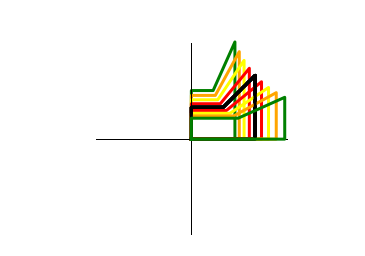

In [7]:
D = matrix([[1.1, 0], [0, 0.9]])
cols = ['k', 'r', 'yellow', 'orange', 'g']

for i in arange(-4, 5):
    dog(D**i, mycolour = cols[abs(i)])

Because $\mathbf{D}$ is diagonal it it's particular easy to invert it, or raise it to a power:

$$
\mathbf{D}^n =
\begin{pmatrix}
1.1^n& 0 \\
0 & 0.9^n
\end{pmatrix},\quad
\mathbf{D}^{-1} =
\begin{pmatrix}
1/1.1& 0 \\
0 & 1/0.9
\end{pmatrix},
$$

as  the effect on the $x$ and $y$ components is *decoupled*. In fact we could also raise it to a non-integer power this way, something we don't yet know how to do for a non-diagonal matrix.

That's not the case with

$$
\mathbf{A}=
\begin{pmatrix}
1.1& .1 \\
.1 & 0.9
\end{pmatrix}
$$

but we can still plot the effect of applying $\mathbf{A}^n$ to the dog for $n = -4, -3, \ldots,3,4$.

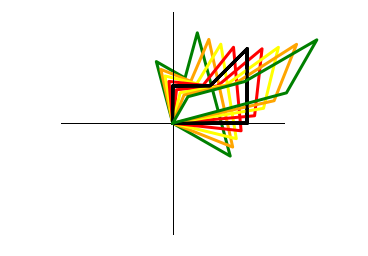

In [15]:
A = matrix([[1.1, 0.1], [0.1, 0.9]])

for i in arange(-4, 5):
    dog(A**i, mycolour = cols[abs(i)])

In both cases it appears that particular points on the dog are following curved trajectories as the mapping is repeatedly applied. This shouldn't surprise us, as we've already seen that matrices can induce rotations, and rotation implies motion on a curved path. We can make a matrix that induces an arbitrary rotation:

$$
\mathbf{R}(\theta)=
\begin{pmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & cos\theta
\end{pmatrix},
$$

and implement $\mathbf{R}(\pi/30)$ as before.

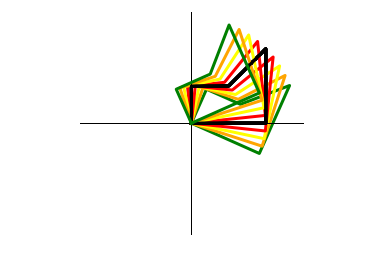

In [16]:
def R(theta):
    return matrix([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])

for i in arange(-4, 5):
    dog(R(pi/30)**i, mycolour = cols[abs(i)])

As expected, each point on the dog follows a circular path. We can also observe that the left and right columns of $\mathbf{R}(\theta)$ are the co-ordinates of the images of the unit vectors in the $x$ and $y$ directions respectively. So if we wanted to rotate a pair of *orthogonal* vectors (vectors at right angles to one another) so that they lie along the axes we could make a rotation matrix from the vectors, normalized to unit length, rather than calculating the angle between them and the axes. **[needs impoving]**

## Arrows

It's easy to infer from the images of the dog under repeated application of $\mathbf{R}(\pi/30)$ what's happening to all the other points that don't happen to coincide with one of the dog's corners, but that's not so easy for $\mathbf{D}$ or $\mathbf{A}$. Another way of visualizing these three transformations is to take a lattice of points across the plane and draw an arrow from each lattice  point to its image under the matrix in question. This needs another function - make sure you understand how it works, consulting online help if necessary. 

In [77]:
def arrows(M, a_max=3, N_arrows=11):
    x_axes = [-a_max, a_max, nan, 0, 0]
    y_axes = [0, 0, nan, -a_max, a_max]
    plot(x_axes, y_axes, 'k-', linewidth=1)

    x, y = meshgrid(linspace(-a_max, a_max, N_arrows), 
                    linspace(-a_max, a_max, N_arrows))
    X = matrix(vstack([x.ravel(), y.ravel()]))
    dX = array(M*X -  X)
    quiver(x, y, dX[0, :], dX[1, :], width=0.003, 
           angles='xy', scale_units='xy', scale=1, pivot='tail')
    axis('equal')
    axis('off')

Note that we have to make `X` a matrix object so that `M*X` is a matrix multiplication, but we then have to convert `dX` into an array object because `quiver()` requires array objects as arguments.

We'll try it out with $\mathbf{R}(\pi/30)$ since we know what the resulting picture should look like.

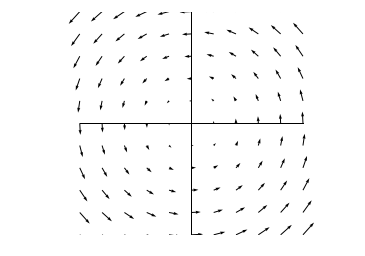

In [85]:
arrows(R(pi/30))

Pictures like this are most useful for transformations that only move points a short distance, i.e. those induced by matrices that are in some sense close to $\mathbf{I}$. Try redrawing the picture above for $\mathbf{R}(\pi/2)$ to see what you get for transformations that move points a long way.

#### Exercise

How would the arrow plots of a matrix and its inverse be related? Plot some examples to see if you were right. 

Now let's try it for $\mathbf{D}$ and $\mathbf{A}$. We can superimpose the dog picture too.

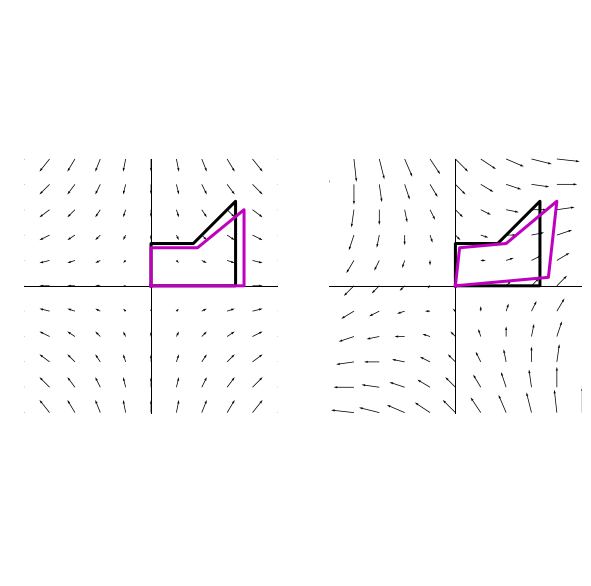

In [95]:
figsize(10, 10)    # Make the figure bigger because it'll contain two subplots
subplot(1, 2, 1)
arrows(D)
dog(D)
subplot(1, 2, 2)
arrows(A)
dog(A)

It's easy to imagine we see curves and circles in these pictures, though in fact each trajectory caused by repeated mapping of a point consists of finite-sized steps, rather than a smooth curve; only if the matrix caused the points to move infinitesimally would the trajectories be smooth.

The diagonal matrix $\mathbf{D}$ causes the arrows to line up head-to-tail along the axes, pointing out along the $x$-axis and in along the  $y$-axis. The non-diagonal matrix $\mathbf{A}$ produces a similar picture and there are lines radiating from the origin along which the arrows would line up head-to-tail. Indeed, the arrow picture for $\mathbf{A}$ appears to be very similar to a rotated version of the arrow picture for $\mathbf{D}$, which raises the question of whether we could write a matrix like $\mathbf{A}$ as the product of a rotation, a diagonal matrix and a rotation in the opposite direction. It turns out that we can and that it's a very useful thing to do.

First we'll plot the arrow field for $\mathbf{A}$ with those lines superimposed and then we'll learn how to calculate them.

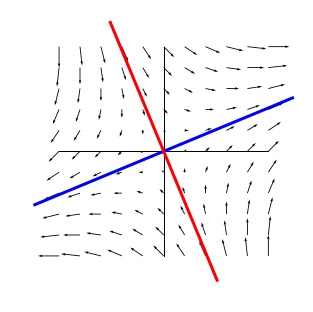

In [102]:
figsize(5, 5)     # Back to normal size
arrows(A)
plot([-3.6955, 3.6955], [-1.5307, 1.5307], 'b-', linewidth=3)
plot([-1.5307, 1.5307], [3.6955, -3.6955], 'r-', linewidth=3)

To determine the necessary rotation matrix we could try to determine the angle between the axes and the lines along which the vectors line up but, as we noted above, all we need to know are the unit vectors pointing along those lines and they will be the columns of our rotation matrix. These vectors are called the *characteristic vectors* of the matrix, or its *eigenvectors* and we'll calculate them next.

## Eigenvectors and eigenvalues

If $\mathbf{v}$ is a point on either the red or the blue line then transforming it with $\mathbf{A}$ must take it to another point on the same line, which could also be achieved by multiplying it by some scalar $\lambda$. In our case we'd expect $\lambda > 1$ for the blue line, and $\lambda < 1$ for the red line. These are the *characteristic values* or *eigenvalues* of the matrix; each one corresponds to an associated eigenvector. In either case we can write

$$
\mathbf{Av}=\lambda\mathbf{v},
$$

or

$$
\mathbf{Av} - \lambda\mathbf{v} = \mathbf{0},
$$

where the RHS is a vector all of whose elements are zero. At this point it would be nice to take the common factor $\mathbf{v}$ out of each term on the LHS, but we can't subtract the scalar $\lambda$ from the matrix $\mathbf{A}$ as their dimensions are different. We can, however, use the identity matrix $\mathbf{I}$ to write

$$
\mathbf{Av} - \lambda\mathbf{Iv} = \mathbf{0},
$$

since $\lambda\mathbf{Iv} = \lambda\mathbf{v}$. So we can factorize to get

$$
(\mathbf{A}-\lambda\mathbf{I})\mathbf{v} = \mathbf{0}, \tag{1}
$$

which we can write for our particular $\mathbf{A}$ as

$$
\left(\begin{pmatrix} 1.1 & 0.1 \\ 0.1 & 0.9 \end{pmatrix} -
\begin{pmatrix} \lambda & 0 \\ 0 & \lambda \end{pmatrix}\right)\begin{pmatrix} v_x \\ v_y \end{pmatrix} =
\begin{pmatrix}0\\0\end{pmatrix},
$$

or

$$
\begin{pmatrix} 1.1-\lambda & 0.1 \\ 0.1 & 0.9-\lambda \end{pmatrix}\begin{pmatrix} v_x \\ v_y \end{pmatrix} =
\begin{pmatrix}0\\0\end{pmatrix}. \tag{2}
$$

Two notebooks ago we established that any matrix that mapped a point other than the origin to the origin must be singular so that must be true of $(\mathbf{A}-\lambda\mathbf{I})$, and if it's singular its determinant must be zero, so we have

$$
\begin{vmatrix} 1.1-\lambda & 0.1 \\ 0.1 & 0.9-\lambda \end{vmatrix}=0,
$$

and we can use the formula for a $2\times2$ determinant to obtain

$$
(1.1-\lambda)(0.9-\lambda) - 0.1\times0.1 = 0
$$

or

$$
\lambda^2 - 2\lambda +0.98 = 0.
$$

This is called the *characteristic equation* of $\mathbf{A}$, and its LHS is called the *characteristic polynomial* of $\mathbf{A}$. Every $n\times n$ matrix has a characteristic polynomial of degree $n$, with leading coefficient $1$, which will in general have $n$ solutions, which are the eigenvalues of $\mathbf{A}$. In our case we can find the two solutions, which we'll call $\lambda_1$ and $\lambda_2$ using the quadratic formula:

$$
\lambda = \frac{2 \pm \sqrt{4 - 4\times0.98}}{2}
$$

giving

$$
\lambda_1 = 1.14142, \quad \lambda_2 = 0.858579,
$$

to five significant figures. Since $\lambda_1 > 1$ we can associate it with the blue line, likewise we can associate $\lambda_2$ with the red line. Now we need to determine $\mathbf{v}_1$ and $\mathbf{v}_2$, vectors that lie along those lines.  To find $\mathbf{v}_1$ we substitute $\lambda_1$ into ($1$) or ($2$) to get

$$
\begin{pmatrix} 1.1-1.14142 & 0.1 \\ 0.1 & 0.9-1.14142 \end{pmatrix}\begin{pmatrix} v_{x1} \\ v_{y1} \end{pmatrix} =
\begin{pmatrix}0\\0\end{pmatrix},
$$

or

$$
\begin{pmatrix} -0.04142 & 0.1 \\ 0.1 & -0.24142 \end{pmatrix}\begin{pmatrix} v_{x1} \\ v_{y1} \end{pmatrix} =
\begin{pmatrix}0\\0\end{pmatrix}.
$$

This gives us two simultaneous equations in $v_{x1}$ and $v_{y1}$ but because, as we've already established, $\mathbf{A}-\lambda\mathbf{I}$ is singular they'll effectively both be the same equation, which we can confirm by noting that $0.1\div-0.04142 = -0.24142\div0.1$. But that's OK because if Eq. ($1$) is true for $\lambda_1$ and $\mathbf{v}_1$, then it's true for any scalar multiple of $\mathbf{v}_1$, i.e.\ any point on the blue line. So it's enough to be able to say (from either of the simultaneous equations) that

$$
v_{y1} = \frac{0.1}{0.04142}v_{x1}  = 0.024142v_{x1},
$$

or

$$
\begin{pmatrix} v_{x1} \\ v_{y1} \end{pmatrix} = \alpha\begin{pmatrix} 1 \\ 0.4142 \end{pmatrix},
$$

where $\alpha$ is any number apart from zero. To fix $\mathbf{v}_1$ at a particular value we'll chose $\alpha$ so that $|\mathbf{v}|=1$ to give the unit vector

$$
\begin{pmatrix} v_{x1} \\ v_{y1} \end{pmatrix} = \alpha\begin{pmatrix} 0.92388 \\ 0.38268 \end{pmatrix}.
$$

Proceeding in the same way with $\lambda=\lambda_2$ leads to

$$
\begin{pmatrix} v_{x2} \\ v_{y2} \end{pmatrix} = \alpha\begin{pmatrix} -0.38268 \\ 0.92388 \end{pmatrix}.
$$

We can check that $\mathbf{v}_1^T\mathbf{v}_2=0$ so the eigenvectors are orthogonal.

Having gone through all that you'll probably be pleased to know that NumPy can do the whole procedure automatically.

In [112]:
lambdas, V = numpy.linalg.eig(A)

lambdas

array([ 1.14142136,  0.85857864])

In [113]:
V

matrix([[ 0.92387953, -0.38268343],
        [ 0.38268343,  0.92387953]])

Note the types of the objects that were returned; if `A` had been an array object they would both have been returned as arrays. As it is we have a matrix $\mathbf{V}$ whose columns are the eigenvectors of $\mathbf{A}$. We can use it to plot the eigenvectors on the arrow as we did before.

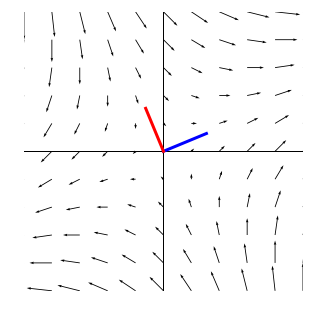

In [121]:
arrows(A)
vx1, vy1, vx2, vy2 = V[0, 0], V[1, 0], V[0, 1], V[1, 1]
plot([0, vx1], [0, vy1], 'b-', linewidth=3)
plot([0, vx2], [0, vy2], 'r-', linewidth=3)

The blue and red lines are shorter because the eigenvectors are normalized to have unit length. As we remarked earlier, a $2\times 2$ matrix whose columns are orthogonal unit vectors is a rotation, which means that if we apply $\mathbf{V}$ to the dog it should rotate so that its base and its left side lie along the eigenvectors. We'll make the eigenvectors longer so they're not hidden by the transformed dog.

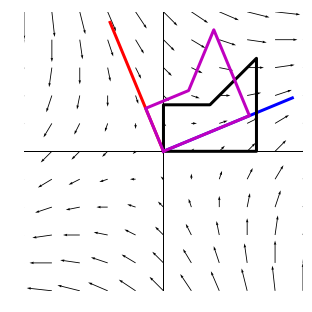

In [122]:
arrows(A)
plot([0, 3*vx1], [0, 3*vy1], 'b-', linewidth=3)
plot([0, 3*vx2], [0, 3*vy2], 'r-', linewidth=3)
dog(V)

If $\mathbf{V}$ rotates points anticlockwise then its inverse $\mathbf{V}^{-1}$ will rotate them clockwise through the same angle. We can think of this as a change of axes - if $\mathbf{p}$ is a point that occupies a particular position relative to the blue and red axes, then $\mathbf{V}^{-1}\mathbf{p}$ occupies the same position relative to the regular $x$-$y$ axes. So by applying $\mathbf{V}^{-1}$ we're changing axes we're rotating the eigenvectors (red and blue) to lie along the $x$ and $y$ axes.

We've already seen a transformation where the eigenvalues are the axes - it was induced by $\mathbf{D}$ the diagonal matrix. The eigenvectors could be used as the basis for a new coordinate system where the blue and red lines replace the $x$ and $y$-axes. Any point in the plane can be described as a linear combination of the unit vectors along the blue and red lines just as much as it can be described as a linear combination of $\begin{pmatrix} 1&0\end{pmatrix}^T$ and $\begin{pmatrix} 0&1\end{pmatrix}^T$, the unit vectors along the $x$ and $y$-axes. And once a figure has been represented in terms of these new axes the action of $\mathbf{A}$ is as easy to describe as the action of the diagonal matrix $\mathbf{D}$ was: stretch along the blue line and squash along the red line.

So, if everything we've said so far is correct, the effect of multiplying by $\mathbf{A}$ should be the same as rotating the figure clockwise with $\mathbf{V}^{-1}$, pre-multiplying the result by the diagonal matrix
\begin{equation}
\mathbf{L} = \begin{pmatrix}  \lambda_1 & 0 \\ 0 & \lambda_2 \end{pmatrix} =
\begin{pmatrix} 1.14142 & 0 \\ 0 & 0.858579 \end{pmatrix},
\end{equation}
and then applying $\mathbf{V}$ to the result to return it to its original coordinate system. In other words
\begin{equation}
\mathbf{A} = \mathbf{VLV}^{-1},
\end{equation}
(remember the operations are carried out in the reverse order to the one they're written in). Let's check if this is true. First we construct L

In [135]:
L = matrix(diag(lambdas))
L

matrix([[ 1.14142136,  0.        ],
        [ 0.        ,  0.85857864]])

In [136]:
V*L*inv(V)

matrix([[ 1.1,  0.1],
        [ 0.1,  0.9]])

It worked, and we can represent the three stages of this transformation as they apply to the dog. First rotate clockwise so that the eigenvectors become the axes:

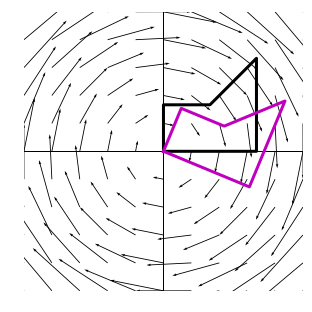

In [145]:
arrows(inv(V))
dog(inv(V))

...then stretch and shrink along the axes...

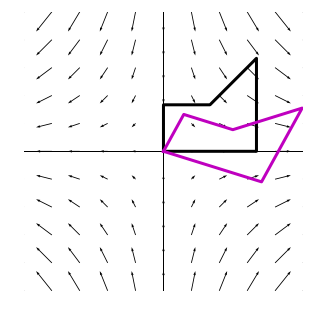

In [146]:
arrows(L)
dog(L*inv(V))

...then rotate back to the original axes.

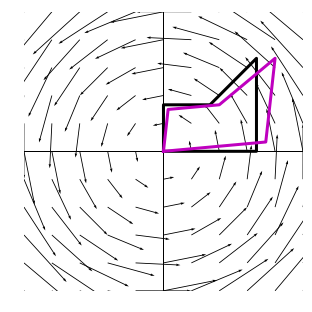

In [147]:
arrows(V)
dog(V*L*inv(V))

So what? Why should converting one matrix into the product of three other matrices make anything easier rather than harder? To see how it can help, consider raising $\mathbf{A}$ to the third power:

$$
\begin{split}
\mathbf{A}^3 &= \mathbf{AAA} \\
& = (\mathbf{VLV}^{-1})(\mathbf{VLV}^{-1})(\mathbf{VLV}^{-1})\\
& = \mathbf{VL(V}^{-1}\mathbf{V)L(V}^{-1}\mathbf{V)LV}^{-1} \\
& = \mathbf{VLILILV}^{-1} \\
& = \mathbf{VLLLV}^{-1} \\
& = \mathbf{VL}^3\mathbf{V}^{-1}.
\end{split}
$$

This is much easier to compute because $\mathbf{L}$ is diagonal, so

$$
\mathbf{L}^3 = \begin{pmatrix} \lambda_1^3 & 0 \\ 0 & \lambda_2^3 \end{pmatrix},
$$

and the saving will be even greater with larger matrices.

So we can raise matrices like $\mathbf{A}$ to arbitrary and non-integer powers almost as easily as we can $\mathbf{D}$ by *diagonalizing* them like this. Diagonalizing the matrix also reveals that its determinant must be the product of its eigenvalues, and therefore that if any of its eigenvalues are zero a matrix must be singular.

#### Exercise
Use Numpy to confirm this result for this example.

## Matrices that don't look like rotated diagonal matrices

It's nice to be able to diagonalize $\mathbf{A}$ and matrices like it, but what about matrices whose eigenvectors can't be seen when arrows are drawn from source to image points? What about

$$
\mathbf{Q} = \mathbf{R}(\pi/6) = \begin{pmatrix}
 {\sqrt{3}}/{2} & -\frac{1}{2} \\
 \frac{1}{2} & {\sqrt{3}}/{2}
\end{pmatrix},
$$

for example? Although we can't draw blue and red lines we can still follow the same mathematical steps as we did with $\mathbf{A}$. So once again, $\mathbf{Q} - \lambda\mathbf{I}$ must be singular so


$$
\begin{vmatrix}
 {\sqrt{3}}/{2}-\lambda & -\frac{1}{2} \\
 \frac{1}{2} & {\sqrt{3}}/{2} - \lambda
\end{vmatrix} = 0
$$

which gives us the following characteristic equation

$$
\lambda ^2-\sqrt{3} \lambda +1=0
$$

which has roots

$$
\lambda_1 = \frac{\sqrt{3}+\mathrm{i}}{2},\quad
\lambda_2 = \frac{\sqrt{3}-\mathrm{i}}{2}.
$$

Since the eigenvalues are complex we would expect the same to be true of the eigenvectors, and indeed they are:

$$
\mathbf{v}_1 = \begin{pmatrix}
 \mathrm{i}  \\
 1
\end{pmatrix},\quad
\mathbf{v}_2 = \begin{pmatrix}
 -\mathrm{i}  \\
 1
\end{pmatrix},
$$

but we still have

$$
\begin{pmatrix}
 \mathrm{i} & -\mathrm{i} \\
 1 & 1
\end{pmatrix}
\begin{pmatrix}
 (\sqrt{3}+\mathrm{i})/{2} & 0 \\
 0 & (\sqrt{3}-\mathrm{i})/{2}
\end{pmatrix}
\begin{pmatrix}
 \mathrm{i} & -\mathrm{i} \\
 1 & 1
\end{pmatrix}^{-1} =
\begin{pmatrix}
 {\sqrt{3}}/{2} & -\frac{1}{2} \\
 \frac{1}{2} & {\sqrt{3}}/{2}
\end{pmatrix}.
$$

In fact, most matrices can be diagonalized like this.

#### Exercises

Use `numpy.linalg.eig()` to obtain the eigenvalue decomposition for $\mathbf{Q}$ and account for any differences you see.

## Summary
[Edit this cell to summarise what you've learned in this notebook.]